<a href="https://colab.research.google.com/github/duanefonseca/CricketML/blob/main/ajuste_polinomio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ajuste de uma funcão polinomial. Usuário escolhe o grau da função.

## Por exemplo, grau = 0 significa a equação y=A.
## Grau = 1, y=A + BX
## Grau = 2, y=A + BX + CX^2
... e assim por diante.
##Subsitutua o filepath pelo caminho onde se encontra o seu arquivo.



Coeficientes do modelo:
[ 0.71573325 -8.16846047 45.0853443 ]
Equação do polinômio:

        2
0.7157 x - 8.168 x + 45.09
Média dos valores de x: 6.71
Média dos valores de y: 23.43
Coeficiente de determinação, R²:  0.28
Soma do quadrado dos resíduos (SQR):  327.26
Graus de liberdade (GL): 25
Log-verossimilhança: -74.15
AIC: 154.30
Teste F:  4.95
Significância do ajuste, p:  0.02
Ajuste do modelo é significativo


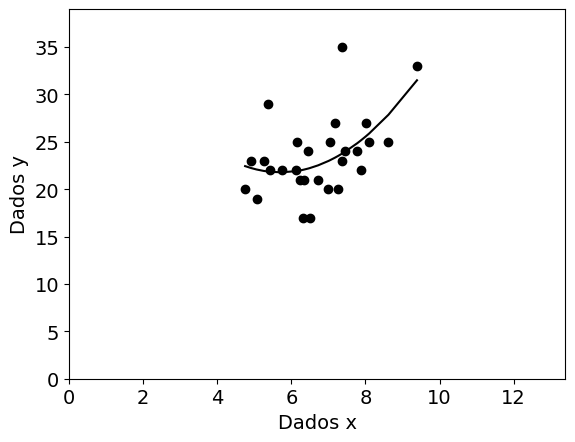

<Figure size 500x500 with 0 Axes>

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.stats import f as f_dist
import math

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']

#substituir pelo file path do seu arquivo
filepath = "/content/drive/MyDrive/arquivos_dados_colab/ajuste_funcao/Dados.csv"

## Carregar arquivo CSV com dados_x and dados_y - dados_x na coluna A; dados_y na coluna B ##

df = pd.read_csv(filepath)

dados_x = df.iloc[:, 0].values  # Data from column A
dados_y = df.iloc[:, 1].values  # Data from column B

# DEFINIR O GRAU DO POLINOMIO (0, Y=A; 1, Y=BX+A; 2, Y=CX2+BX+A; ETC...)
grau = 2

# Fit the polynomial to the data
Zz = np.polyfit(dados_x, dados_y, grau)
p = np.poly1d(Zz)


# Display the coefficients and the equation of the polynomial
print("Coeficientes do modelo:")
print(Zz)

print("Equação do polinômio:")
print()
print(p)


# Print the averages of dados_x and dados_y
print(f"Média dos valores de x: {np.mean(dados_x):.2f}")
print(f"Média dos valores de y: {np.mean(dados_y):.2f}")

# Calculate the coefficient of determination R²
y_pred = p(dados_x)
SSR = np.sum((y_pred - dados_y)**2)  # Sum of the squares of the residuals
SST = np.sum((dados_y - np.mean(dados_y))**2)  # Total sum of squares
R2 = 1 - (SSR/SST)
print(f"Coeficiente de determinação, R²: {R2: .2f}")

# Print the sum of the squares of the residuals and the degrees of freedom of the model
print(f"Soma do quadrado dos resíduos (SQR): {SSR: .2f}")

# Calculate the degrees of freedom
DF = len(dados_y) - (grau + 1)
print(f"Graus de liberdade (GL): {DF}")

# Calculate the log-likelihood
n = len(dados_y)
log_likelihood = -n/2 * math.log(2*math.pi) - n/2 * math.log(SSR/n) - n/2
print(f"Log-verossimilhança: {log_likelihood:.2f}")

# Calculate the AIC
k = grau + 1  # Number of parameters
AIC = 2*k - 2*log_likelihood
print(f"AIC: {AIC:.2f}")

# Perform the F test
n = len(dados_y)  # Number of observations
k = grau + 1  # Number of parameters
F_stat = (R2 / (k - 1)) / ((1 - R2) / (n - k))
p_value = 1 - f_dist.cdf(F_stat, k - 1, n - k)
print(f"Teste F: {F_stat: .2f}")
print(f"Significância do ajuste, p: {p_value: .2f}")

# Check the significance of the fit
if p_value < 0.05:
    print("Ajuste do modelo é significativo")

# Plot the data and the fitted polynomial
plt.scatter(dados_x, dados_y, color='black')
sns.lineplot(x=dados_x, y=p(dados_x), color='k')
# FORMATAR O TAMANHO DA FONTE DA LEGENDA DO EIXO e TITULO DO EIXO
fontsize_axes = 14
plt.xlabel('Dados x', fontsize=fontsize_axes)
plt.ylabel('Dados y', fontsize=fontsize_axes)
# FORMATAR TAMANHO DA FONTE DOS NUMEROS DOS EIXOS
fontsize_ticks = 14
plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)
# FORMATAR CENTRALIZACAO DOS DADOS DO GRAFICO
plt.xlim(0, max(dados_x) + 4)
plt.ylim(0, max(dados_y) + 4)
# FORMATAR TAMANHO DO GRAFICO
largura_grafico = 5 # Width of the graph
altura_grafico = 5 # Height of the graph
# Set the size of the graph
plt.figure(figsize=(largura_grafico, altura_grafico))
# Show the graph
plt.show()

# Interpretação dos resultados acima. Como são modelos aninhados, o usuário pode querer comparar estatísticamente dois modelos diferentes. Nesse caso, o modelo com maior (ou menos negativo) log-verossimilhança e menor valor de AIC deve ser o escolhido.

## No código abaixo o usuário pode escolher dois modelos e comparar usando a razão de verossimilhanças. Esse teste tem distribuição qui-quadrado, com 1 grau de liberdade (valor tabelado = 3,84)

Enter the degree for the first model: 0
Enter the degree for the second model: 1

Model 1 (Degree 0):
Log-likelihood: -78.82
Number of parameters: 1
R²: 0.0000

Model 2 (Degree 1):
Log-likelihood: -75.60
Number of parameters: 2
R²: 0.2055

Likelihood Ratio Test:
Test statistic (R): 6.4419
Qui-quadrado tabulado: 3.84
Degrees of freedom: 1
p-value: 0.0111
O modelo com maior grau (mais parâmetros) é significativamente melhor, p = 0.0111


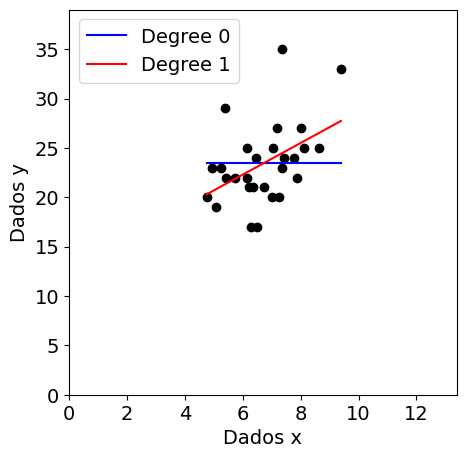

In [16]:
from scipy.stats import f as f_dist, chi2

matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = ['DejaVu Sans']

def polynomial_regression(dados_x, dados_y, grau):
    # Fit the polynomial to the data
    Zz = np.polyfit(dados_x, dados_y, grau)
    p = np.poly1d(Zz)

    # Calculate R²
    y_pred = p(dados_x)
    SSR = np.sum((y_pred - dados_y)**2)
    SST = np.sum((dados_y - np.mean(dados_y))**2)
    R2 = 1 - (SSR/SST)

    # Calculate log-likelihood
    n = len(dados_y)
    log_likelihood = -n/2 * math.log(2*math.pi) - n/2 * math.log(SSR/n) - n/2

    # Number of parameters
    num_params = grau + 1

    return {
        'coefficients': Zz,
        'polynomial': p,
        'R2': R2,
        'log_likelihood': log_likelihood,
        'num_params': num_params,
        'SSR': SSR
    }

# Load data
df = pd.read_csv('/content/drive/MyDrive/arquivos_dados_colab/ajuste_funcao/Dados.csv')
dados_x = df.iloc[:, 0].values
dados_y = df.iloc[:, 1].values

# Get user input for two models
grau1 = int(input("Enter the degree for the first model: "))
grau2 = int(input("Enter the degree for the second model: "))

# Ensure grau1 < grau2
if grau1 > grau2:
    grau1, grau2 = grau2, grau1

# Perform regression for both models
model1 = polynomial_regression(dados_x, dados_y, grau1)
model2 = polynomial_regression(dados_x, dados_y, grau2)

# Likelihood Ratio Test
R = 2 * (model2['log_likelihood'] - model1['log_likelihood'])
df_diff = model2['num_params'] - model1['num_params']
p_value_lrt = 1 - chi2.cdf(R, df_diff)

print(f"\nModel 1 (Degree {grau1}):")
print(f"Log-likelihood: {model1['log_likelihood']:.2f}")
print(f"Number of parameters: {model1['num_params']}")
print(f"R²: {model1['R2']:.4f}")

print(f"\nModel 2 (Degree {grau2}):")
print(f"Log-likelihood: {model2['log_likelihood']:.2f}")
print(f"Number of parameters: {model2['num_params']}")
print(f"R²: {model2['R2']:.4f}")

print(f"\nLikelihood Ratio Test:")
print(f"Test statistic (R): {R:.4f}")
print("Qui-quadrado tabulado: 3.84")
print(f"Degrees of freedom: {df_diff}")
print(f"p-value: {p_value_lrt:.4f}")

if p_value_lrt < 0.05:
    print(f"O modelo com maior grau (mais parâmetros) é significativamente melhor, p = {p_value_lrt:.4f}")
else:
    print(f"O modelo com maior grau (mais parâmetros) NÃO é significativamente melhor, p = {p_value_lrt:.4f}")

# Plotting
fontsize_axes = 14
fontsize_ticks = 14
largura_grafico = 5  # Width of the graph
altura_grafico = 5  # Height of the graph

plt.figure(figsize=(largura_grafico, altura_grafico))

plt.scatter(dados_x, dados_y, color='black')
sns.lineplot(x=dados_x, y=model1['polynomial'](dados_x), color='blue', label=f'Degree {grau1}')
sns.lineplot(x=dados_x, y=model2['polynomial'](dados_x), color='red', label=f'Degree {grau2}')

plt.xlabel('Dados x', fontsize=fontsize_axes)
plt.ylabel('Dados y', fontsize=fontsize_axes)

plt.xticks(fontsize=fontsize_ticks)
plt.yticks(fontsize=fontsize_ticks)

plt.xlim(0, max(dados_x) + 4)
plt.ylim(0, max(dados_y) + 4)

plt.legend(fontsize=fontsize_ticks)

plt.show()